In [54]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [91]:
input_dim = 784 #28*28 
X_train = X_train.reshape(60000, input_dim) 
X_test = X_test.reshape(10000, input_dim) 
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 

#normalize
X_train /= 255 
X_test /= 255

In [92]:
from keras import utils as np_utils
Y_train = np_utils.to_categorical(y_train) 
Y_test = np_utils.to_categorical(y_test)

In [93]:
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Activation 
output_dim = nb_classes = 10 
model = Sequential() 
model.add(Dense(output_dim, input_dim=input_dim, activation='softmax')) 
batch_size = 128 
nb_epoch = 20

In [109]:
# uncomment the code below to read a saved model and weights 
#model = model_from_json(open('mnist_Logistic_model.json').read())# if json 
#model.load_weights('mnist_Logistic_wts.h5')

# use custom weights
import numpy as np
# small weight
# weight1 = np.zeros((784, 10))
# weight2 = np.zeros(10)

# larget weight
weight1 = np.full((784, 10), 2)
weight2 = np.full((10), 2)

weight = [weight1, weight2]
model.set_weights(weight)

In [110]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoch,verbose=1, validation_data=(X_test, Y_test)) 
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

/Users/kuoweichiao/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 39us/step - loss: 1.2498 - acc: 0.7847 - val_loss: 0.7974 - val_acc: 0.8468
Epoch 2/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.7057 - acc: 0.8507 - val_loss: 0.5997 - val_acc: 0.8693
Epoch 3/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.5805 - acc: 0.8648 - val_loss: 0.5203 - val_acc: 0.8781
Epoch 4/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.5204 - acc: 0.8725 - val_loss: 0.4757 - val_acc: 0.8844
Epoch 5/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4836 - acc: 0.8780 - val_loss: 0.4463 - val_acc: 0.8894
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4583 - acc: 0.8820 - val_loss: 0.4259 - val_acc: 0.8910
Epoch 7/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.4396 - acc: 0.8854 - val_loss: 0.4100 - val_acc

In [111]:
# save model and weights
# # save model as json
# json_string = model.to_json()
# open('mnist_Logistic_model.json', 'w').write(json_string)

# # save the weights in h5 format model.save_weights('mnist_Logistic_wts.h5')
# model.save_weights('mnist_Logistic_wts.h5') 

In [113]:
%matplotlib inline
import matplotlib.pyplot as plt

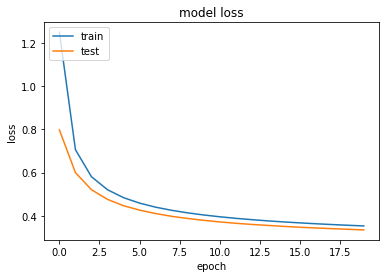

In [114]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()